<a href="https://colab.research.google.com/github/Muhammad-Usama-07/Natural-Language-Processing/blob/main/Sentiment_Analysis/WorkFile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np

# Read Data

In [ ]:
data = pd.read_csv('movie_review_test.csv')
data.head()

,class,text
0,Pos,films adapted from comic books have had plent...
1,Pos,every now and then a movie comes along from a...
2,Pos,you ve got mail works alot better than it des...
3,Pos,jaws is a rare film that grabs your atte...
4,Pos,moviemaking is a lot like being the general m...


# Find number of positive and negative classes

In [ ]:
print(data['class'].value_counts())

Pos    200
Neg    200
Name: class, dtype: int64


# Find proportion of positive and negative classes

In [ ]:
print((data['class'].value_counts()/len(data['class']) * 100))

Pos    50.0
Neg    50.0
Name: class, dtype: float64


# Find length of longest and shortest review

In [ ]:
# longest review
max_reviews = max(data['text'].str.len())
print(max_reviews)

# shortest review
min_reviews = min(data['text'].str.len())
print(min_reviews)

10999
962


# Detecting Sentiment 

In [ ]:
from textblob import TextBlob
sent_obj = TextBlob(data['text'][0])
print(sent_obj.sentiment)

Sentiment(polarity=0.02095457285330703, subjectivity=0.47927694668201004)


# Build Wordcloud of a Sentence

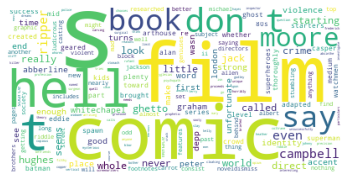

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
cloud_of_sentence = WordCloud(background_color = 'white').generate(data['text'][0])
plt.imshow(cloud_of_sentence)
plt.axis('off')
plt.show()

## WordCloud without stopwords

In [ ]:
stopwords_to_remove = {'t', 'S', 'were', "hasn't", 'ever', 'against', 'there', 'did', 'below', 'both', 'into', "doesn't", 'no', "we're", 'just', 'which', 'also', 'a', "mustn't", 'ourselves', "we'll", 'only', "shan't", 'shall', "they've", "you're", 'i', 'it', 'they', 'could', 'all', 'few', 'she', "we've", 'can', "who's", "i'm", 'yourselves', 'these', "wouldn't", 'being', "i've", 'itself', "you'll", 'herself', "there's", 'should', 'out', 'by', 'br', 'he', 'hers', 'otherwise', 'themselves', "they'll", 'down', 'since', 'has', 'before', 'during', "shouldn't", 'the', 'so', 'be', 'its', "won't", 'you', 'once', "what's", 'ours', 'again', "here's", 'until', 'not', 'then', 'movies', 'them', 'else', 'who', "didn't", 'further', 'as', 'doing', 'get', 'over', 'therefore', 'my', 'from', 'do', 'any', 'having', "he'll", "they'd", 'have', 'after', 'films', 'ought', 'but', "we'd", 'between', 'through', 'or', 'an', "how's", 'of', "you've", 'nor', 'however', 'his', 'under', 'such', 'than', 'those', "why's", 'what', "they're", 'most', 'about', 'k', "weren't", 'are', "when's", 'more', 'to', 'when', 'why', 'yourself', 'some', 'does', "i'd", 'that', 'up', 'him', "he'd", "let's", "don't", "i'll", "aren't", 'too', 'been', "isn't", 'our', "where's", 'where', 'we', 'whom', 'because', 'would', 'in', 'other', 'with', 'watch', 'hence', 'yours', "hadn't", 'each', 'same', "couldn't", 'myself', 'above', 'theirs', 'your', 'film', 'is', 'own', 'r', 'like', "that's", 'while', 'here', 'www', 'himself', 'very', "you'd", 'if', "haven't", 'http', 'on', 'her', "she'd", 'cannot', 'and', 'off', 'this', "wasn't", "he's", 'am', "it's", 'their', 'how', 'had', 'com', 'movie', "she's", "she'll", 'at', 'me', "can't", 'for', 'was'}

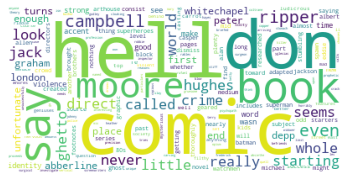

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
cloud_of_sentence = WordCloud(background_color = 'white', stopwords = stopwords_to_remove).generate(data['text'][0])
plt.imshow(cloud_of_sentence)
plt.axis('off')
plt.show()

# Create Bag-of-words of sentences

In [ ]:
three_sentences = data['text'][0:3]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(three_sentences)
sentences_bow = vect.transform(three_sentences)
print(sentences_bow.toarray())

[[1 1 1 ... 0 1 4]
 [0 0 0 ... 2 0 2]
 [0 0 0 ... 1 0 3]]


# Detect Language

In [ ]:
from langdetect import detect_langs
st = '绝对不是。' # chinese
print(detect_langs(st))

[zh-cn:0.9999974847082811]


# Default English Stopwords

In [1]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
ENGLISH_STOP_WORDS

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

## adding new stopwords

In [2]:
my_stop_words = ENGLISH_STOP_WORDS.union(['new1', 'new2', '*'])
my_stop_words

frozenset({'*',
           'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
    

# Lemmatization

In [3]:
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize